In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Nouvelle section


1-Phase préliminaire

🎒 Nous commençons par la phase d'importation des librairies que nous allons utiliser.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
sns.set_theme(style="darkgrid")
import scipy.stats as spy


💾 Importation des données contenues dans le fichier 'Cheapestelectriccars-EVDatabase_2023.csv'
dans un Dataframe nommé df et affichage des 10 premières lignes.

In [ ]:
df=pd.read_csv("/Cheapestelectriccars-EVDatabase_202.csv")
df.head(10) # affichage 10 premières lignes  pour vérifier que l'importation des données s'est bien déroulée.

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Lucid Air Dream Edition P,118 kWh useable battery Available sin...,2.7 sec,270 km/h,645 km,183 Wh/km,820 km/h,All Wheel Drive,5,"€218,000",NaN
1,Porsche Taycan Turbo S,83.7 kWh useable battery Available si...,2.8 sec,260 km/h,400 km,209 Wh/km,980 km/h,All Wheel Drive,4,"€189,668","£142,400"
2,Audi e-tron GT RS,85 kWh useable battery Available sinc...,3.3 sec,250 km/h,405 km,210 Wh/km,1000 km/h,All Wheel Drive,4,"€146,050","£115,000"
3,Renault Zoe ZE50 R110,52 kWh useable battery Available sinc...,11.4 sec,135 km/h,315 km,165 Wh/km,230 km/h,Front Wheel Drive,5,"€36,840",NaN
4,Audi Q4 e-tron 35,52 kWh useable battery Available sinc...,9.0 sec,160 km/h,285 km,182 Wh/km,360 km/h,Rear Wheel Drive,5,NaN,NaN
5,Tesla Model Y Performance,75 kWh useable battery Available sinc...,3.7 sec,250 km/h,415 km,181 Wh/km,640 km/h,All Wheel Drive,5,"€63,667","£59,990"
6,Porsche Taycan 4 Cross Turismo,83.7 kWh useable battery Available si...,5.1 sec,220 km/h,425 km,197 Wh/km,1050 km/h,All Wheel Drive,4,"€98,514","£84,500"
7,Renault Zoe ZE50 R135,52 kWh useable battery Available sinc...,9.5 sec,140 km/h,310 km,168 Wh/km,230 km/h,Front Wheel Drive,5,"€37,840","£29,995"
8,Porsche Taycan Turbo,83.7 kWh useable battery Available si...,3.2 sec,260 km/h,415 km,202 Wh/km,1020 km/h,All Wheel Drive,4,"€156,348","£119,900"
9,Smart EQ fortwo coupe,16.7 kWh useable battery Available si...,11.6 sec,130 km/h,100 km,167 Wh/km,-,Rear Wheel Drive,2,"€21,940",NaN


👉 (a) affichage des caractéristiques du fichier

In [ ]:
print(df.info()) # on constate que toutes les colonnes sont en format string à l'exception de 'NumberofSeats'
print(df.shape) # 11 colonnes et 308 enregistrements
print(df.isna().sum()) # valeurs manquantes
print(df.duplicated().sum()) #somme des doublons est égale à 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             309 non-null    object
 1   Subtitle         309 non-null    object
 2   Acceleration     309 non-null    object
 3   TopSpeed         309 non-null    object
 4   Range            309 non-null    object
 5   Efficiency       309 non-null    object
 6   FastChargeSpeed  309 non-null    object
 7   Drive            309 non-null    object
 8   NumberofSeats    309 non-null    int64 
 9   PriceinGermany   282 non-null    object
 10  PriceinUK        198 non-null    object
dtypes: int64(1), object(10)
memory usage: 26.7+ KB
None
(309, 11)
Name                 0
Subtitle             0
Acceleration         0
TopSpeed             0
Range                0
Efficiency           0
FastChargeSpeed      0
Drive                0
NumberofSeats        0
PriceinGermany      27
PriceinUK    

🚨 A cette étape, nous allons faire le choix de ne pas travailler la colonne 'PriceinUK' qui contient de nombreuses valeurs manquantes!

👉(b) Création du dictionnaire associant les anciens noms aux nouveaux noms de colonnes

In [ ]:
dictionnaire = {
'Name':'Modele'
,'Acceleration':'Acceleration (sec)'
,'TopSpeed':'Vitesse de pointe (km/h)'
,'Range':'Autonomie (km)'
,'Efficiency':'Consommation energie (Wh/km)'
,'FastChargeSpeed':'Charge rapide (km/h)'
,'Drive':'Transmission'
,'NumberofSeats':'Nombre de places'
,'PriceinGermany':'Prix en Euros (DE)'
,'PriceinUK':'Prix en Livre sterling (UK)'
}
df = df.rename(dictionnaire, axis = 1)
print(df.columns.tolist())  # affichage de la liste des colonnes

['Modele', 'Subtitle', 'Acceleration (sec)', 'Vitesse de pointe (km/h)', 'Autonomie (km)', 'Consommation energie (Wh/km)', 'Charge rapide (km/h)', 'Transmission', 'Nombre de places', 'Prix en Euros (DE)', 'Prix en Livre sterling (UK)']



👉 (c) création de nouvelles colonnes 🍳

In [ ]:
# Marque à partir de Modele
df['Marque'] = df['Modele'].apply(lambda Modele: (Modele.split(' ')[0]).strip())  #strip enelever les espaces apply applique la fonction lambda à toute la colonne
print(len(df['Marque'].unique())) # il y a 49 marques marques différentes
# recuperation de l'année de sortie à partir de Subtitle
df['Année de sortie'] = df['Subtitle'].apply(lambda Subtitle: Subtitle.split(' ')[-1])
#recuperation de la l'année de sortie à partir de Subtitle
df['Capacité de la batterie (kWh)'] = df['Subtitle'].apply(lambda Subtitle: Subtitle.split(' ')[0])
#suppression de la colonne "Subtitle"
df=df.drop("Subtitle", axis=1)
df.head()

49


,Modele,Acceleration (sec),Vitesse de pointe (km/h),Autonomie (km),Consommation energie (Wh/km),Charge rapide (km/h),Transmission,Nombre de places,Prix en Euros (DE),Prix en Livre sterling (UK),Marque,Année de sortie,Capacité de la batterie (kWh)
0,Lucid Air Dream Edition P,2.7 sec,270 km/h,645 km,183 Wh/km,820 km/h,All Wheel Drive,5,"€218,000",NaN,Lucid,2022,118
1,Porsche Taycan Turbo S,2.8 sec,260 km/h,400 km,209 Wh/km,980 km/h,All Wheel Drive,4,"€189,668","£142,400",Porsche,2020,83.7
2,Audi e-tron GT RS,3.3 sec,250 km/h,405 km,210 Wh/km,1000 km/h,All Wheel Drive,4,"€146,050","£115,000",Audi,2021,85
3,Renault Zoe ZE50 R110,11.4 sec,135 km/h,315 km,165 Wh/km,230 km/h,Front Wheel Drive,5,"€36,840",NaN,Renault,2019,52
4,Audi Q4 e-tron 35,9.0 sec,160 km/h,285 km,182 Wh/km,360 km/h,Rear Wheel Drive,5,NaN,NaN,Audi,2021,52


👉 (d) Transformation des valeurs et changement des types des colonnes 🍳

In [ ]:
df['Acceleration (sec)']=df['Acceleration (sec)'].apply(lambda x : x[:-3])
df['Acceleration (sec)'] = pd.to_numeric(df['Acceleration (sec)']) #
#Boucle pour effectuer une seule action de modif par une boucle sur les colonnes
for i in df[['Charge rapide (km/h)',"Vitesse de pointe (km/h)","Consommation energie (Wh/km)",'Autonomie (km)','Prix en Euros (DE)','Prix en Livre sterling (UK)']]:
    df[i]=df[i].str.replace('\D*',"", regex=True) #e#remplacer tous les caractères non numériques "\D" en mode regex=T. Le * implique un nombre non précisé de caractère
    df[i] = pd.to_numeric(df[i]) # conversion en numérique int ou float
#remplacement des valeurs de la colonne "Transmission" par des libelles en Français
print(df['Transmission'].unique())
df.replace({'Rear Wheel Drive' : 'Propulsion',
                 'Front Wheel Drive' : 'Traction',
                 'All Wheel Drive' : 'Integrale'},
                inplace = True)
#pour vérifier que toutes les modifications ont été bien réalisées
print(df.info())
print(df['Transmission'].unique())
df.head()

['All Wheel Drive' 'Front Wheel Drive' 'Rear Wheel Drive']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Modele                         309 non-null    object 
 1   Acceleration (sec)             309 non-null    float64
 2   Vitesse de pointe (km/h)       309 non-null    int64  
 3   Autonomie (km)                 309 non-null    int64  
 4   Consommation energie (Wh/km)   309 non-null    int64  
 5   Charge rapide (km/h)           306 non-null    float64
 6   Transmission                   309 non-null    object 
 7   Nombre de places               309 non-null    int64  
 8   Prix en Euros (DE)             282 non-null    float64
 9   Prix en Livre sterling (UK)    198 non-null    float64
 10  Marque                         309 non-null    object 
 11  Année de sortie                309 non-null    obje

,Modele,Acceleration (sec),Vitesse de pointe (km/h),Autonomie (km),Consommation energie (Wh/km),Charge rapide (km/h),Transmission,Nombre de places,Prix en Euros (DE),Prix en Livre sterling (UK),Marque,Année de sortie,Capacité de la batterie (kWh)
0,Lucid Air Dream Edition P,2.7,270,645,183,820.0,Integrale,5,218000.0,NaN,Lucid,2022,118
1,Porsche Taycan Turbo S,2.8,260,400,209,980.0,Integrale,4,189668.0,142400.0,Porsche,2020,83.7
2,Audi e-tron GT RS,3.3,250,405,210,1000.0,Integrale,4,146050.0,115000.0,Audi,2021,85
3,Renault Zoe ZE50 R110,11.4,135,315,165,230.0,Traction,5,36840.0,NaN,Renault,2019,52
4,Audi Q4 e-tron 35,9.0,160,285,182,360.0,Propulsion,5,NaN,NaN,Audi,2021,52


2- Exploration préliminaire des variables du jeu de données. 🧐🧐

Nous disposons dans ce jeu de données de 4 variables qualitatives/catégorielles: Marque, Modele,Transmission et le nombre de places

Nous disposons également de 9 variables quantitatives/numériques:
1. Capacité de la batterie (kWh)
2. Acceleration (sec)
3. Vitesse de pointe (km/h)
4. Autonomie (km)
5. Consommation d'énergie  (Wh/km)
6. Charge rapide  (km/h)
7. Transmission
8. Prix en Euros (DE)
9. Prix en Livre sterling (UK) 🚨 que nous n'utiliserons pas dans notre étude 🚨

La variable 'Année de sortie' ne rentre pas dans ces définitions même si elle est numérique (temps). Cela nous permet de presenter à Monsieur Philippe les différentes caractéristiques que compose un véhicule électrique

👉(a) Nous allons afficher les répartitions des modalités de quelques variables qualitatives

In [ ]:
df.describe() #pour avoir la moyenne, ecart type, le min et le max de chaque colonne quantitative

,Acceleration (sec),Vitesse de pointe (km/h),Autonomie (km),Consommation energie (Wh/km),Charge rapide (km/h),Nombre de places,Prix en Euros (DE),Prix en Livre sterling (UK)
count,309.000000,309.000000,309.000000,309.000000,306.000000,309.000000,282.000000,198.000000
mean,7.532039,180.754045,361.440129,199.430421,543.562092,5.284790,71039.826241,64255.196970
std,3.127109,38.738187,110.861212,33.021626,247.200836,0.978567,41731.536969,37481.721471
min,2.100000,125.000000,95.000000,150.000000,150.000000,2.000000,21940.000000,25995.000000
25%,4.900000,150.000000,275.000000,174.000000,330.000000,5.000000,46990.000000,38876.250000
50%,7.000000,180.000000,370.000000,192.000000,500.000000,5.000000,58752.500000,52682.500000
75%,9.000000,200.000000,440.000000,214.000000,680.000000,5.000000,77275.000000,76336.500000
max,19.100000,320.000000,685.000000,295.000000,1240.000000,7.000000,400000.000000,350000.000000


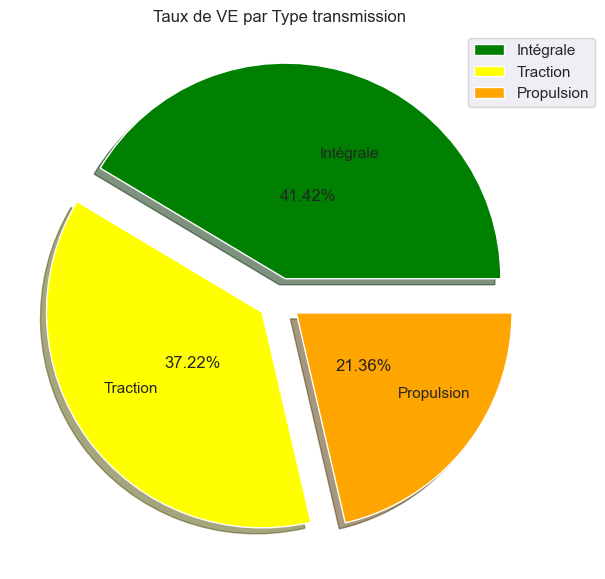

In [ ]:
plt.figure(figsize = (7, 7))
plt.title('Taux de VE par Type transmission')
plt.pie(x = df["Transmission"].value_counts(), #compte le valeur max de transmission
  colors = ['green', 'yellow','orange'],labels=['Intégrale','Traction','Propulsion'],
           explode = [ 0.1, 0.1, 0.1],#espace les portions
           autopct='%.2f%%',#permet d'avoir la part en pourcentage à 2 chiffre après la virgule
           pctdistance = 0.4, labeldistance = 0.6, #position des labels et les valeurs par rapport au centre du camembert
           shadow = True)

plt.legend(loc='upper right', bbox_to_anchor=(1.1,1)); #position de la legende à + 1.5 en haut à droite

Sur le marché,les véhicules à transmission intégrales représentent 41,42% du jeu, les véhicules à traction 37,22% et les véhicules à propulsion 21,36%.

👋Le-saviez_vous?

 En réalité,la transmission dite à "Propulsion" qui était
auparavant la plus répandue sur le marché de l'électrique a progressivement cédé la place à la "traction" avant sur la plupart des voitures modernes.
La principale raison qui a motivé ce changement tient à la répartition inégale du poids entre l’avant et l'arrière du véhicule.
La transmission "intégrale"  de la puissance aux quatre roues est constante.
Les véhicules configurés en "intégrale" sont plus lourds et entraînent donc une consommation de carburant
 plus importante car le moteur est davantage sollicité pour les faire rouler.

👉(b) Quelles sont les gammes de véhicules disponibles ?

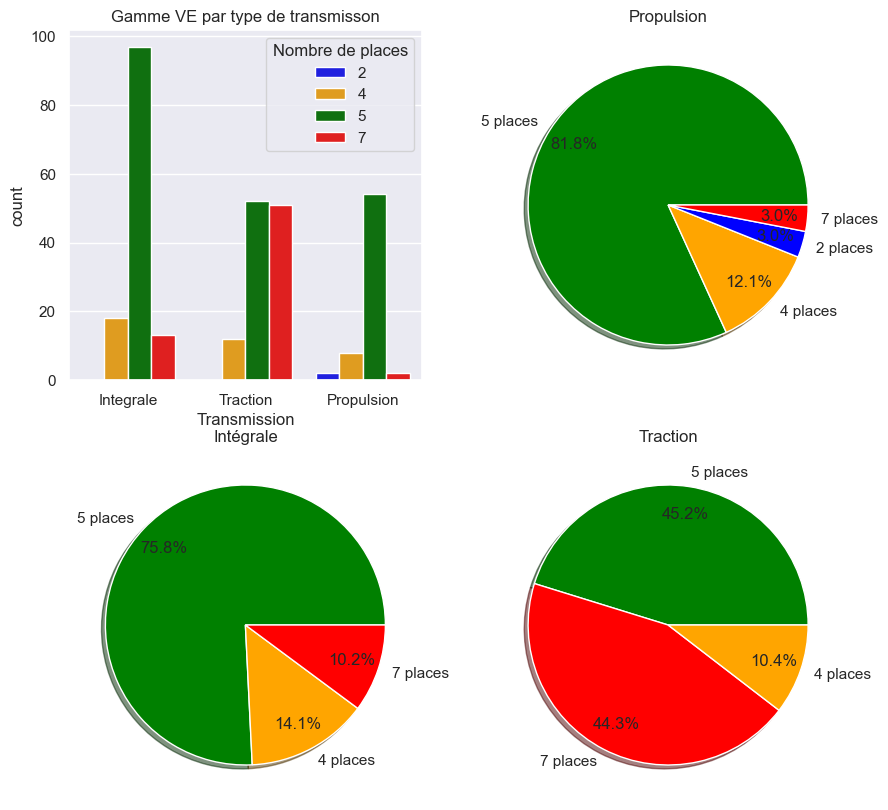

In [ ]:
# Nombre de places vs Type de transmission
plt.subplot(2, 2, 1) # on positionne 2 graphique en ordonneé et 2 graphique en abscisse le premier graphique prend la position 1
sns.countplot(x='Transmission',hue='Nombre de places',palette=['blue','orange','green','red'],data=df)
plt.title('Gamme VE par type de transmisson')
# Camemberts
plt.subplot(2, 2, 2)
plt.title("Propulsion")
plt.pie(x             = df['Nombre de places'][df["Transmission"]=='Propulsion'].value_counts(),
        labels        = ['5 places', '4 places', '2 places', '7 places'],
        colors        = ['green','orange','blue','red'],
        labeldistance = 1.1,
        autopct       = '%.1f%%',
        pctdistance   = 0.8,
        shadow        = True)

plt.subplot(2, 2, 3)
plt.title("Intégrale")
plt.pie(x             = df['Nombre de places'][df["Transmission"]=='Integrale'].value_counts(),
        labels        = ['5 places', '4 places', '7 places' ],
        colors        = ['green','orange','red'],
        labeldistance = 1.1,
        autopct       = '%.1f%%',
        pctdistance   = 0.8,
        shadow        = True)

plt.subplot(2, 2, 4)
plt.title("Traction")
plt.pie(x             = df['Nombre de places'][df["Transmission"]=='Traction'].value_counts(),
        labels        = ['5 places', '7 places', '4 places' ],
        colors        = ['green','red','orange'],
        labeldistance = 1.1,
        autopct       = '%.1f%%',
        pctdistance   = 0.8,
        shadow        = True)

# Pour agrandir la figure
fig = plt.gcf() # gcf permet l'ajout de graphe dans la même figure
fig.set_size_inches(10,10) # définit la taille de la figure en pouces

 On remarque que les "5 places"  représentent l'offre la plus commune dans le jeu de données et les véhicules
à "traction" proposent une gamme plus élargie de "familiales" à 7 places.

👉 (c) Quid des niveaux de Prix par Marque ? (à partir des prix en Euros constatés en Allemagne)


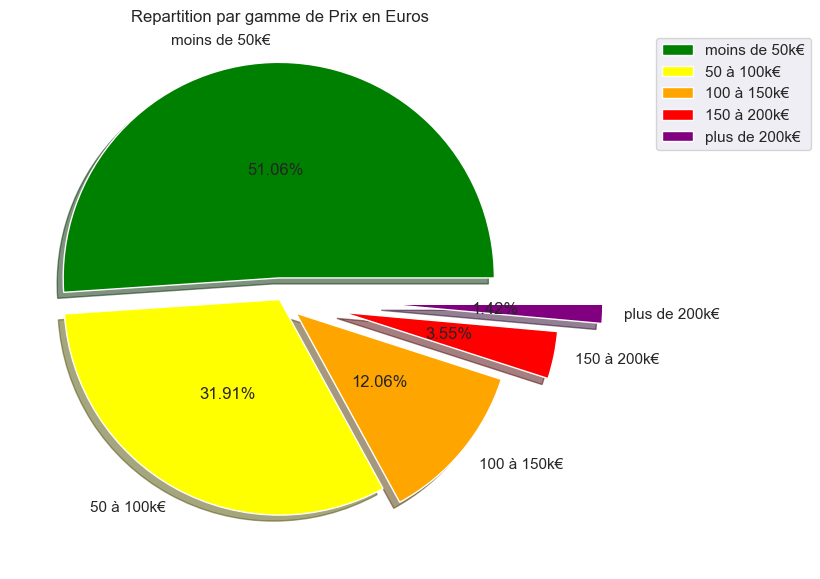

In [ ]:
# on crèe une variable des intervalles de prix de 50 k€ à partir de 25k€
df['intervallePrixEuros'] = pd.cut(x=df['Prix en Euros (DE)'],
    bins=[0.0,50000.0,100000.0,150000.0,200000.0,df['Prix en Euros (DE)'].max()],
      right=True) #methode cut permet de créer des intervalles bins defini les bornes right true inclue la valeur à droite de la borne,
# on peut rajouter label pour définir des noms à l'intervalle par défaut il prend le nom [intervalle]
plt.figure(figsize = (7, 7))
plt.title('Repartition par gamme de Prix en Euros')
plt.pie(x = df.intervallePrixEuros.value_counts(),
            labels = ['moins de 50k€','50 à 100k€','100 à 150k€','150 à 200k€','plus de 200k€'],
            colors = ['green', 'yellow','orange', 'red', 'purple'],
            explode = [0.1, 0, 0.1, 0.3 ,0.5],
            autopct = '%.2f%%',
            pctdistance = 0.5, labeldistance = 1.1,
            shadow = True)
plt.legend(loc='upper right',bbox_to_anchor=(1.5,1));

Un peu plus de la moitié des véhicules a un tarif inférieur à 50000 euros et le graphique suivant montre l'offre de prix par Marque de véhicule.

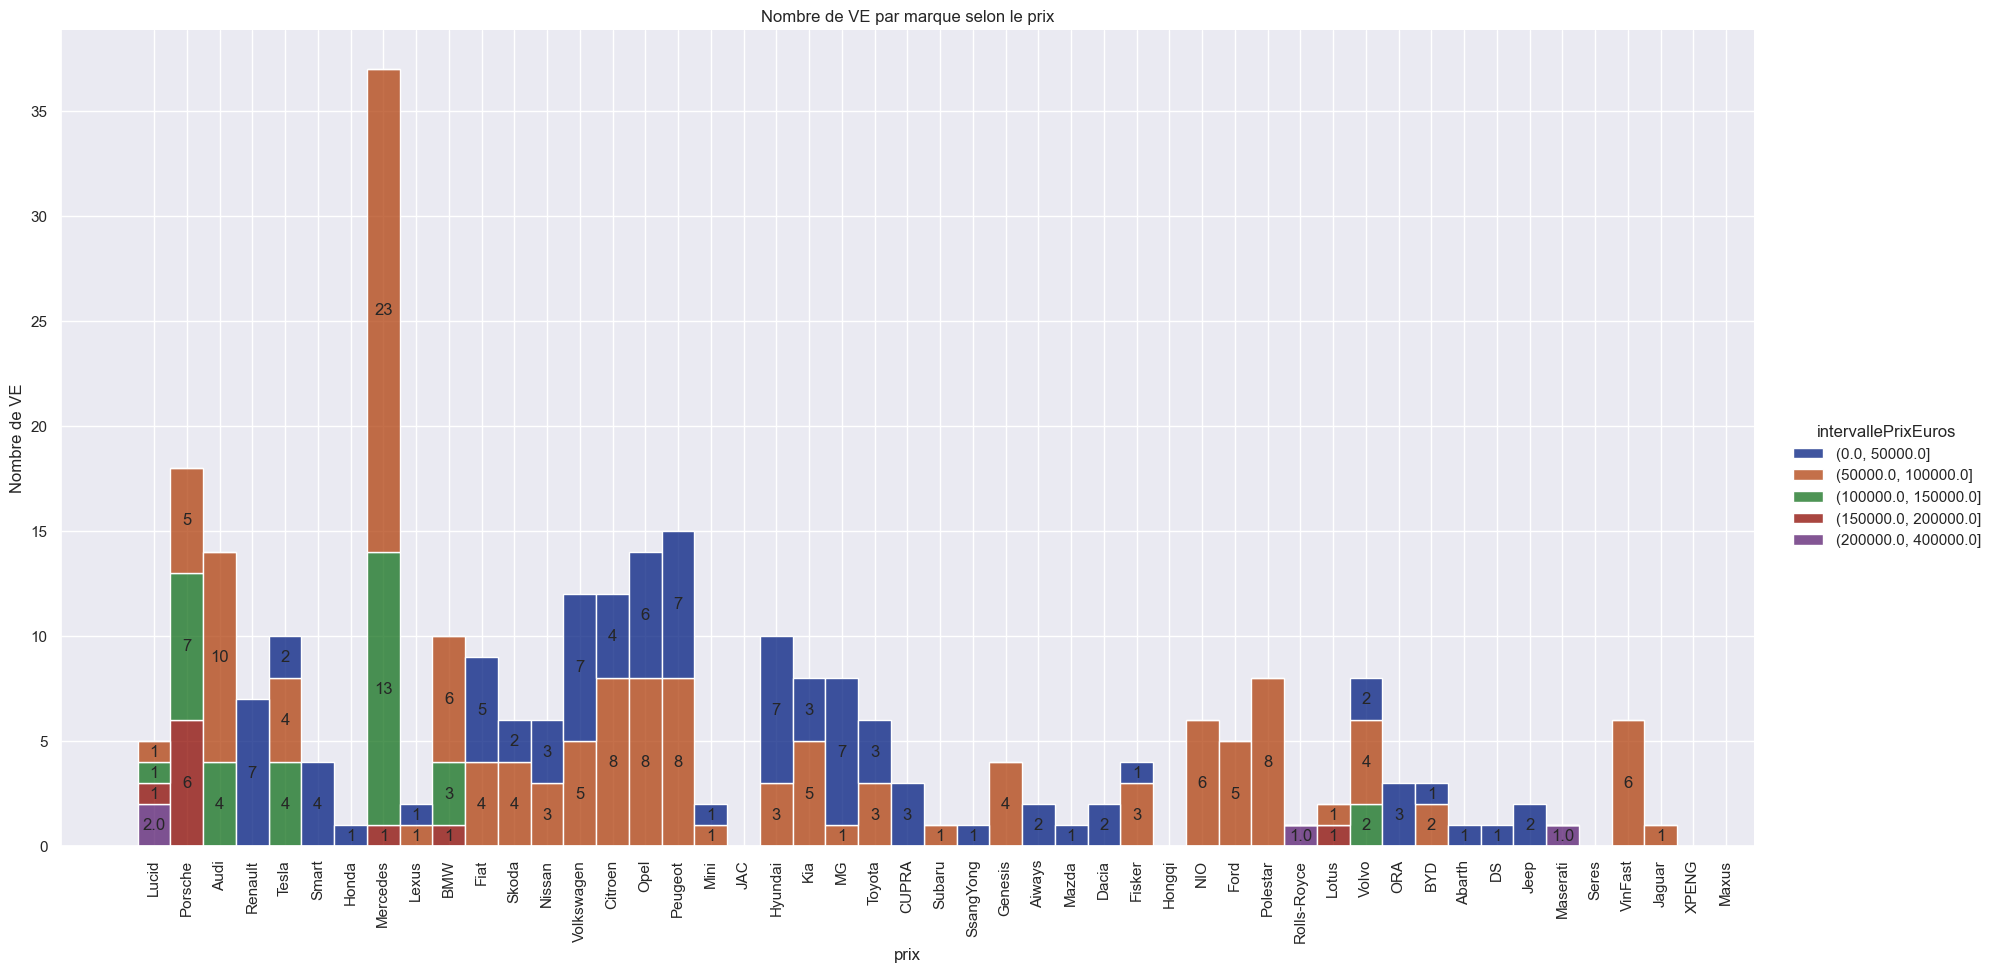

In [ ]:
g = sns.displot(data=df, x='Marque', hue='intervallePrixEuros', multiple='stack', discrete=True, height=9,palette="dark", aspect=2) #ddisplot permet d'avoir une visualisation avec une autre donnée. Ici on prend x la marque, en y compte
#le nombre de vehicule que possede chaque marque, hue prend l'intervalle de prix pour la valeur de véhicule par marque dans chaque intervalle,multiple stack permet d'empiler les valeurs, discrete=true pour prendre que les valeurs uniques, multiple stack permet d'empiler les valeurs
#height hauteur de la figure, aspect le rapport de chaque valeur  defini la largeur, palette dark rend moins opaque les plot, aspect

# iteration pour chaque axe
sns.color_palette("bright")
plt.xticks(rotation=90) #l'axe de x les labels sont retournés de 90
plt.xlabel('prix')
plt.ylabel('Nombre de VE')
plt.title('Nombre de VE par marque selon le prix')

for ax in g.axes.flat:#flat itére à chaque boucle sur l'axes de g
    # iteration pour chaque container
    for c in ax.containers: #itere sur chaque valeur d'une marque
        # Option: si le segment est petit ou =0, on dimensionne le libellé
        #trouvé sur stackoverflow https://stackoverflow.com/questions/41296313/stacked-bar-chart-with-centered-labels
        labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
        # suppression du libellé si non nécéssaire
        ax.bar_label(c, labels=labels, label_type='center')

Dans notre jeu de données, Mercedes possède le plus grand nombre de véhicules (37) mais nous constatons qu'il ne propose aucun véhicule à moins de 50000 euros.
La plupart des marques propose au moins une offre à moins de 100 K€ et seulement 7 marques proposent du très haut de Gamme (>150k€):
Porsche,Mercedes,Lucid,BMW ,Lotus, Rolls-Royce et Maserati .

👉 (d) Comment les prix sont-ils distribués par type de transmission? (Boîte à moustache)

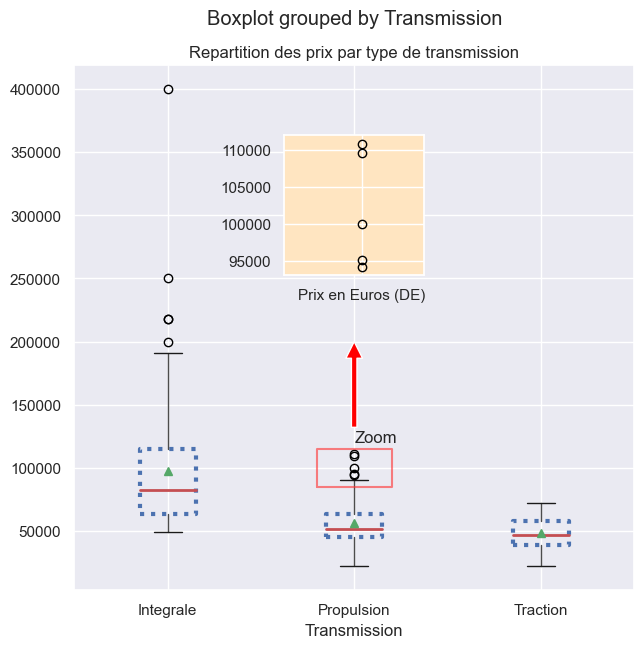

,count,mean,std,min,25%,50%,75%,max
Transmission,,,,,,,,
Integrale,121.0,97822.330579,50010.711194,48990.0,63200.0,82250.0,115000.00,400000.0
Propulsion,55.0,56476.490909,20010.433408,21940.0,45501.5,51900.0,63740.50,110801.0
Traction,106.0,48023.792453,11129.349948,22550.0,39150.0,46775.0,57578.75,72519.0


In [ ]:
boxprops = dict(linestyle=':', linewidth=3, color='b') #defini le style du contour des box ici en pointillé. Si on voulez un trait continue on pourrait mettre -
medianprops = dict(linestyle='-', linewidth=2, color='r')# defini le style la mediane
df.boxplot(column= 'Prix en Euros (DE)', by='Transmission',showfliers=True, showmeans=True,#showfliers=True affiche les points en dehors de la moustache et showmeans affiche la moyenne
                boxprops=boxprops, medianprops=medianprops ,figsize= (7,7))
plt.title('Repartition des prix par type de transmission')# titre
# On crée le carré qui entoure la partie du graphique que l'on va reproduire
# L'argument 'alpha' donne le pourcentage d'opacité du plot (1 opaque, 0 transparent invisible)
plt.plot([1.8, 2.2, 2.2, 1.8, 1.8],[85000, 85000, 115000, 115000, 85000],'#FF3030', alpha = 0.6)
# On crée la flèche rouge, avec le texte 'Zoom' dirigé vers le point (3, 200000)
plt.annotate('Zoom', xy=(2, 200000), xytext=(2,120000),
            arrowprops={'facecolor':'red'} )

plt.axes([0.40, 0.60, .2, .2] ,facecolor='#ffe5c1')
plt.axis([-4,5,93000,112000])
a=(df[df["Transmission"]=='Propulsion'])
a.boxplot(column= 'Prix en Euros (DE)')
plt.show()

display(df.groupby('Transmission')["Prix en Euros (DE)"].describe()) # tableau recapitulatif des Prix par type de transmission

Les véhicules à transmission "intégrale" sont les plus chers avec une médiane (82k€) et une moyenne (97k€), nettement plus élevées que celles des deux autres catégories.Le prix le plus élevé du marché est une "intégrale" de 400000 €.
Le véhicule le moins cher toute catégorie confondue est une "Propulsion" proposée à 21940 € en entrée de gamme. Dans cette catégorie dite à "Propulsion", la médiane est à 52k€ et la moyenne est à 56k€ car influencée par 5 offres à plus 90 k€ (Outliers en Zoom).
Enfin, les prix des véhicules à traction sont distribués "quasi normalement" autour la moyenne de 48 k€ (médiane 47k€).

Pour la suite, nous remplacerons les valeurs manquantes des Prix € par la médiane qui n'est pas sensible aux valeurs extrêmes  🚨

👉(e) Cas d'analyse d'un besoin client à partir du jeu de données (Monsieur Philippe)

Ayant une meilleure connaissance du marché Monsieur Philippe nous fait part qu'il a un budget de 60 k€ et qui souhaite acheter un véhicule électrique selon des critères bien spécifiques
dans l'ordre de leur importance : autonomie,accélération, charge rapide et la vitesse de pointe. 🤗🤗


Methode 1 : Ranking par tri basique des colonnes en fonction des critères de Monsieur Philippe

In [ ]:
df['constante']='a' #on cree un coloonne constante qui à pour valeur a
df['RN'] = df.sort_values(['Acceleration (sec)','Vitesse de pointe (km/h)','Autonomie (km)', 'Charge rapide (km/h)'], ascending=[True,False,False,False]).groupby('constante').cumcount() + 1 #triee le tableau en pour chaque valeur de la colonne constante, on compte le nombre d'element de a en partant de zero et on rajoute +1

df=df.drop("constante", axis=1) # on supprime la colonne précédente
df.loc[df['Prix en Euros (DE)']<60000].nsmallest(5, "RN") #  affichage du Top 5 selon le ranking sort_values


,Modele,Acceleration (sec),Vitesse de pointe (km/h),Autonomie (km),Consommation energie (Wh/km),Charge rapide (km/h),Transmission,Nombre de places,Prix en Euros (DE),Prix en Livre sterling (UK),Marque,Année de sortie,Capacité de la batterie (kWh),intervallePrixEuros,RN
146,Tesla Model 3 Performance,3.3,261,460,163,710.0,Integrale,5,57668.0,57990.0,Tesla,2022,75,"(50000.0, 100000.0]",14
216,Smart #1 Brabus,3.9,180,320,194,490.0,Integrale,5,48990.0,42000.0,Smart,2023,62,"(0.0, 50000.0]",38
253,NIO ET5 75 kWh,4.0,200,395,178,530.0,Integrale,5,59500.0,NaN,NIO,2022,70.5,"(50000.0, 100000.0]",45
193,Fisker Ocean Ultra,4.2,200,510,196,730.0,Integrale,5,57000.0,49880.0,Fisker,2023,100,"(50000.0, 100000.0]",55
124,Tesla Model 3 Long Range Dual Motor,4.4,233,485,155,750.0,Integrale,5,53668.0,50990.0,Tesla,2021,75,"(50000.0, 100000.0]",58




Selon cette méthode ,on observe que le seul choix du Top 15 à moins de 70 k€ est la Tesla Model 3 Performance à 57990.0 (14ème du classement)

Methode 2 : Ranking par calcul d'un nombre de points après affectation d'un coefficient d'importance des variables

1. coef de 4 autonomie
2. coef de 3 rapoort vitesse de pointe/accélération
3. coef de 2 vitesse de pointe
4. coef de 1 charge rapide






In [ ]:

#af['Points']=af.apply(lambda row: (row['Autonomie (km)'] * 4)+ (row['Acceleration (sec)']*3)+ (row['Charge rapide (km/h)']*2)+(af['Vitesse de pointe (km/h)'].max()-row['Vitesse de pointe (km/h)']), axis = 1)
df["Points"]=round(df["Autonomie (km)"]*4+(df["Vitesse de pointe (km/h)"]/df["Acceleration (sec)"])*3+df["Vitesse de pointe (km/h)"]+df["Charge rapide (km/h)"]*2,2)

  # affichage du top 5 selon le nb de points obtenus ....
df[df['Prix en Euros (DE)']<60000].sort_values(by ='Points', ascending = False).iloc[0:5]

,Modele,Acceleration (sec),Vitesse de pointe (km/h),Autonomie (km),Consommation energie (Wh/km),Charge rapide (km/h),Transmission,Nombre de places,Prix en Euros (DE),Prix en Livre sterling (UK),Marque,Année de sortie,Capacité de la batterie (kWh),intervallePrixEuros,RN,Points
201,Hyundai IONIQ 6 Long Range 2WD,7.4,185,475,156,1240.0,Propulsion,5,54000.0,46745.0,Hyundai,2022,74,"(50000.0, 100000.0]",166,4640.00
71,Kia EV6 Long Range 2WD,7.3,185,410,180,1070.0,Propulsion,5,51990.0,45245.0,Kia,2021,74,"(50000.0, 100000.0]",156,4041.03
72,Kia EV6 Long Range AWD,5.2,185,400,185,1050.0,Integrale,5,55980.0,51745.0,Kia,2021,74,"(50000.0, 100000.0]",88,3991.73
168,Hyundai IONIQ 5 Long Range 2WD,7.3,185,390,190,1020.0,Propulsion,5,47900.0,46650.0,Hyundai,2022,74,"(0.0, 50000.0]",157,3861.03
169,Hyundai IONIQ 5 Long Range AWD,5.1,185,385,192,1010.0,Integrale,5,59200.0,50150.0,Hyundai,2022,74,"(50000.0, 100000.0]",85,3853.82


Selon cette méthode, Monsieur Phillippe  a plusieurs choix dans la gamme de prix selon le ranking de points. On remarque que la charge rapide influe grandement sur le ranking par point.  

Cependant il se pose encore plusieurs questions avant de faire son choix.  
Est-ce que l'autonomie a un lien avec l'accélération ? Est-ce-que la vitesse de pointe est une histoire de marque ? et pour finir la transmission joue un rôle sur l'autonomie et la vitesse de pointe ?

3- Analyse exploratoire

Maintenant que nous avons mis en forme les données, il est temps de passer à l'analyse afin d'obtenir une vision globale du jeu de données
et découvrir des formes de régularité.
Nous souhaitons le faire aux moyens de représentations visuelles (et interactives) des données et de recherche automatique de régularités (corrélation et dépendance entre variables,
groupes homogènes, schémas fréquents).

👉(a) Corrélation des variables quantitatives (A/B Test)

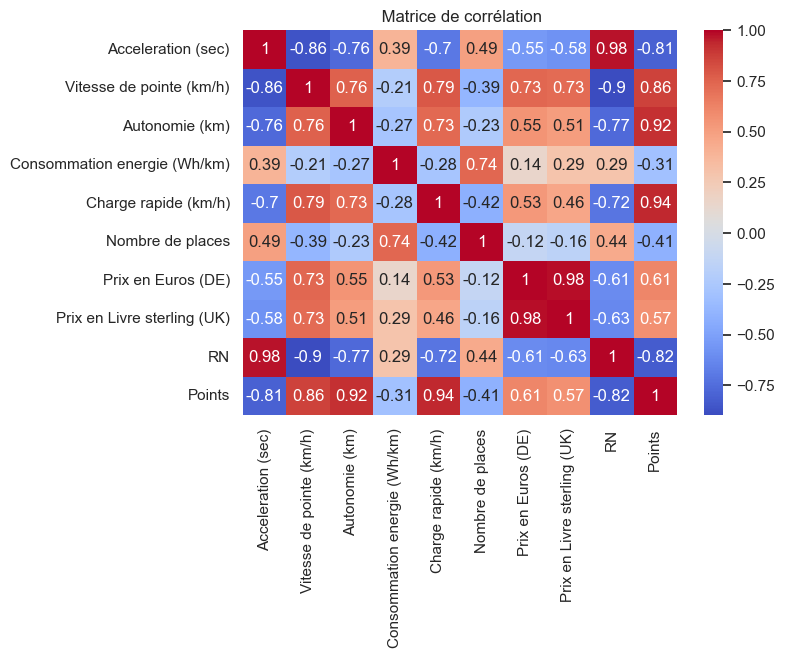

In [ ]:
# correlation entre les variables
cor = df.corr()
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(cor, annot=True, ax=ax, cmap='coolwarm')
plt.title(' Matrice de corrélation');

Le schéma nous montre  qu'il existe des associations statistiques plus ou moins fortes entre plusieurs variables du dataframe.
Par exemple,il y a une corrélation forte entre la capacité de la batterie et l'autonomie du véhicule ou encore entre
la capacité d'accélération et la vitesse de pointe du véhicule.

👉Toutefois, nous pouvons également constater que l'autonomie du véhicule et sa vitesse de pointe sont fortement corrélées.

Nous souhaiterions vérifier selon l'A/B Test avec les hypothèses suivantes:

1. H0 : Les variables Autonomie et Vitesse de pointe ne sont pas corrélées
2. H1 : Les deux variables sont corrélées



Pearson : 2.885567489871987e-60 // Spearman :  6.206222952469774e-62 les valeurs sont inférieures à 5%
Conclusion :avec la p-valeur des tests de Spearman et de Pearson, on conclut à une corrélation donc on rejette H0 et on conserve H1
Le coefficient de corrélation est de : -0.7635641316337429  et ci-dessous le graphique de la courbe de régression négative


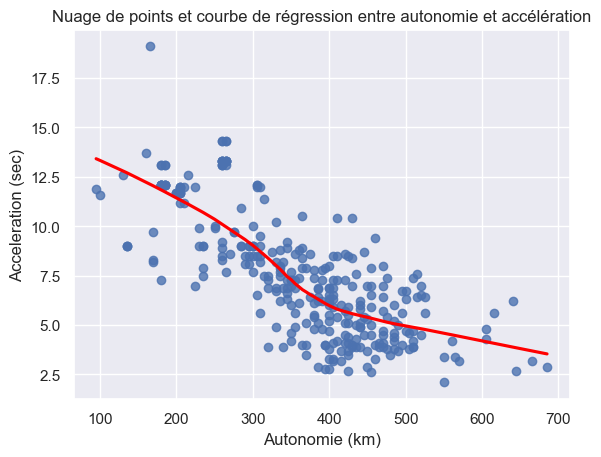

In [ ]:
#le test person et de spearman permet de faire un test avec des valeurs quantitative
from scipy.stats import pearsonr
from scipy.stats import spearmanr
x=df["Autonomie (km)"]
y=df["Acceleration (sec)"]
s = spearmanr(x, y)[1] # p-valeur du test spearmanr
p = pearsonr(x,y)[1] # p-valeur du test pearsonr
cr = pearsonr(x,y)[0] # coef de corr du test pearsonr
print("Pearson :", p, "//", "Spearman : ", s, "les valeurs sont inférieures à 5%")
print("Conclusion :avec la p-valeur des tests de Spearman et de Pearson, on conclut à une corrélation donc on rejette H0 et on conserve H1")
print("Le coefficient de corrélation est de :",cr, " et ci-dessous le graphique de la courbe de régression négative")
sns.regplot(x="Autonomie (km)", y="Acceleration (sec)", lowess=True,data=df, line_kws={"color": "red"})
plt.title('Nuage de points et courbe de régression entre autonomie et accélération');# courbe de régression


👉(b) Corrélation entre une variable qualitative et une variable quantitative (A/B Test selon ANOVA)

Nous souhaitons savoir ici si la Marque influence la vitesse de pointe
1. H0 : Les variables Marque et Vitesse de pointe ne sont pas corrélées
2. H1 : Les deux variables sont corrélées


In [ ]:
# TEST ANOVA Permets d'utiliser une valeur qualitatives et une valeur quantitative
# entre Vitesse et Marque
# Les modalités de Transmission:
## Les hypothèses :

print("Les hypothèses : ")
print("H0 : Il n'y a pas d'influence significative de la Marque sur la vitesse du VE")
print("H1 : Il y a une influence significative de la Marque sur la vitesse du VE")
stats_anova =df
stats_anova = stats_anova.rename(columns={'Autonomie (km)' : 'Autonomie'})# on renomme les noms des colonnes pour avoir un champ texte sans espace
stats_anova = stats_anova.rename(columns={'Vitesse de pointe (km/h)' : 'Vitesse'})
from scipy.stats import pearsonr
import statsmodels.api
result = statsmodels.formula.api.ols('Vitesse ~ Marque', data=stats_anova).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)
## La conclusion :
print("Conclusion : La p-value (PR(>F)) est inférieure à 5 % donc on rejette H0 et on conclut H1")


Les hypothèses : 
H0 : Il n'y a pas d'influence significative de la Marque sur la vitesse du VE
H1 : Il y a une influence significative de la Marque sur la vitesse du VE


,df,sum_sq,mean_sq,F,PR(>F)
Marque,48.0,366424.173202,7633.836942,20.723517,8.225878e-65
Residual,260.0,95775.134242,368.365901,NaN,NaN


Conclusion : La p-value (PR(>F)) est inférieure à 5 % donc on rejette H0 et on conclut H1


On conclut donc a une influence significative du la marque sur la vitesse du Véhicule électrique.

(c) Corrélation entre une variable qualitative et une variable quantitative (A/B Test selon ANOVA)

Existe t il un lien entre le type de transmission et l'autonomie du véhicule?

Les différentes modalités sont : ['Integrale' 'Traction' 'Propulsion']
Les hypothèses : 
H0 : Il n'y a pas d'influence significative du type de transmission sur l'autonomie du VE
H1 : Il y a une influence significative du type de de transmission sur l'autonomie du VE


,df,sum_sq,mean_sq,F,PR(>F)
Transmission,2.0,1.978048e+06,989024.009912,167.451612,7.518522e-50
Residual,306.0,1.807336e+06,5906.327198,NaN,NaN


Conclusion : La p-value (PR(>F)) est inférieure à 5% donc on rejette H0 et on conclut H1


C:\Users\le-li\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


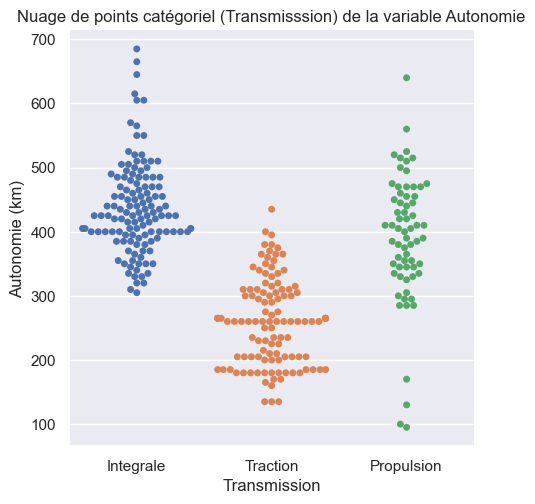

In [ ]:
# TEST ANOVA entre Type de transmission et Autonomie
# Les modalités de Transmission:
print("Les différentes modalités sont :", df["Transmission"].unique())
## Les hypothèses :
print("Les hypothèses : ")
print("H0 : Il n'y a pas d'influence significative du type de transmission sur l'autonomie du VE")
print("H1 : Il y a une influence significative du type de de transmission sur l'autonomie du VE")

from scipy.stats import pearsonr
import statsmodels.api
stats_anova = stats_anova.rename(columns={'Autonomie (km)' : 'Autonomie'})
result = statsmodels.formula.api.ols('Autonomie ~ Transmission', data=stats_anova).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table);

## La conclusion :
print("Conclusion : La p-value (PR(>F)) est inférieure à 5% donc on rejette H0 et on conclut H1")
sns.catplot(x='Transmission', y='Autonomie (km)', hue='Transmission',kind='swarm',data=df)
plt.title('Nuage de points catégoriel (Transmisssion) de la variable Autonomie');

Par ailleurs, Le schéma ci-dessous montre une représentation synthétique des performances par type de transmission.

On conclut donc a une influence significative du type de transmission sur l'autonomie du véhicule . Par ailleurs, Le schéma ci-dessus montre une représentation synthétique de  l'autonomie
par type de transmission.Les valeurs semblent réparties dans des "zones" de performance assez représentatives pour chaque type de transmission.

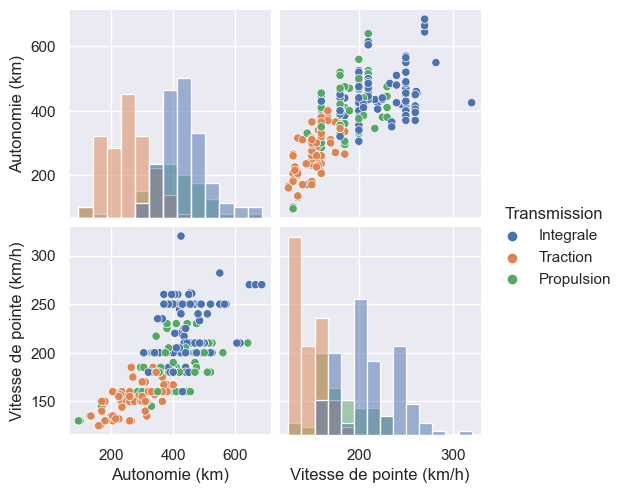

In [ ]:
plots = df[['Modele', 'Autonomie (km)','Vitesse de pointe (km/h)','Transmission']]
sns.pairplot(plots,hue='Transmission',diag_kind="hist") #partage sur les axes y sur une seule ligne et les axes x sur une seule colonne. Les diagrammes diagonaux sont en histogramme. avec pour hue transmission
plt.show()

On remarque que les nuages de points et les histogrammes semblent montrer que les valeurs sont "clustérisées" par type de transmission (couleur) dans des zones de performance assez représentatives.

On présente les différents résultats à Monsieur Philippe, l'autonomie est bien liée à la vitesse de pointe, la vitesse de pointe est liée aussi à la marque. La transmission joue aussi un rôle sur l'autonomie et la vitesse de pointe du véhicule.  

Notamment les véhicules avec une transmission intégrale pour une grande majorité sont plus rapides et ont une meilleure autonomie. Ils présentent également un meilleur rapport vitesse/autonomie et autonomie/vitesse.

Monsieur Philippe souhaite voir le top 5 des vehicule en dessous de 60000€ avec une transmission integrale.

In [ ]:
df[df['Prix en Euros (DE)']<60000].where(df.Transmission=="Integrale").sort_values(by ='Points', ascending = False).iloc[0:5]

,Modele,Acceleration (sec),Vitesse de pointe (km/h),Autonomie (km),Consommation energie (Wh/km),Charge rapide (km/h),Transmission,Nombre de places,Prix en Euros (DE),Prix en Livre sterling (UK),Marque,Année de sortie,Capacité de la batterie (kWh),intervallePrixEuros,RN,Points
72,Kia EV6 Long Range AWD,5.2,185.0,400.0,185.0,1050.0,Integrale,5.0,55980.0,51745.0,Kia,2021,74,"(50000.0, 100000.0]",88.0,3991.73
169,Hyundai IONIQ 5 Long Range AWD,5.1,185.0,385.0,192.0,1010.0,Integrale,5.0,59200.0,50150.0,Hyundai,2022,74,"(50000.0, 100000.0]",85.0,3853.82
193,Fisker Ocean Ultra,4.2,200.0,510.0,196.0,730.0,Integrale,5.0,57000.0,49880.0,Fisker,2023,100,"(50000.0, 100000.0]",55.0,3842.86
124,Tesla Model 3 Long Range Dual Motor,4.4,233.0,485.0,155.0,750.0,Integrale,5.0,53668.0,50990.0,Tesla,2021,75,"(50000.0, 100000.0]",58.0,3831.86
146,Tesla Model 3 Performance,3.3,261.0,460.0,163.0,710.0,Integrale,5.0,57668.0,57990.0,Tesla,2022,75,"(50000.0, 100000.0]",14.0,3758.27


On retrouve bien dans le top 5, avec une transmission intégrale, des véhicules avec une meilleure vitesse de pointe et une meilleure autonomie que dans le ranking précédent. On peut aussi en conclure que dans la méthode de ranking la charge rapide est une composante très forte.  
Suite au résultat, Monsieur Philippe ayant toutes les données, il choisira de partir sur le modele tesla model 3 performances qui presente une très bonne accélération, une excellente vitesse de pointe et une autonomie au-dessus de la moyenne.🤗🤗

4- Machine Learning

"Prédire le prix d'un Véhicule Electrique"

Nous souhaitons construire notre modèle de Machine Learning avec une *régression linéaire* pour prédire le prix d'un véhicule électrique en fonction des caractéristiques suivantes:
Acceleration (sec), Vitesse de pointe (km/h), Autonomie (km), Consommation energie (Wh/km),Charge rapide (km/h) et type de Transmission.

👉Etape 1 - Prétraitement 🍳

* Importation de bibliothèques


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

Suppression des lignes avec des valeurs vides pour les besoins du modèle

In [ ]:
df = df.dropna(axis = 0,subset=['Prix en Euros (DE)','Charge rapide (km/h)'], how ='any') #  On supprime les enregistrements vides pour les 2 colonnes Prix et Charge rapide

#df[df[['Charge rapide (km/h)','Prix en Euros (DE)']].isna().any(axis = 1)]

* Description du dataset

In [ ]:
# Print the shape of dataset in the form of (#rows, #columns)
print(df.shape)

# Describe dataset's main statistics
print(df.describe(include="all"))

(279, 16)
                Modele  Acceleration (sec)  Vitesse de pointe (km/h)  \
count              279          279.000000                279.000000   
unique             278                 NaN                       NaN   
top     Peugeot e-208                  NaN                       NaN   
freq                 2                 NaN                       NaN   
mean               NaN            7.407527                182.236559   
std                NaN            3.128653                 39.326451   
min                NaN            2.100000                125.000000   
25%                NaN            4.850000                152.500000   
50%                NaN            7.000000                180.000000   
75%                NaN            9.000000                207.500000   
max                NaN           19.100000                320.000000   

        Autonomie (km)  Consommation energie (Wh/km)  Charge rapide (km/h)  \
count       279.000000                    279.0

* Identification de la Variable cible 'Prix en Euros (DE)' et de ses caractéristiques explicatives


In [ ]:

# Separer la variable cible  Y des ses variables explicatives X
print("Séparer les libellés des variables explicatives...")
features_list = ['Acceleration (sec)', 'Vitesse de pointe (km/h)', 'Autonomie (km)', 'Consommation energie (Wh/km)','Transmission']
X = df.loc[:,features_list]
y = df.loc[:,"Prix en Euros (DE)"]
print("...Effectué!")
print()

Séparer les libellés des variables explicatives...
...Effectué!



* Divisons le jeu de données en jeu d'entraînement (80% du volume) et jeu de test (20% du volume) 🖖

In [ ]:
# Jeu de données à diviser
## Tout d’abord, nous importons train_test_split

print("Splitting dataset into train set and test set...")
## utilisation du train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0)

print("...Effectué!")

Splitting dataset into train set and test set...
...Effectué!


Ensuite, nous devons faire trois choses:

1. Normaliser les données
2. Encodage à chaud de la variable qualitative "Transmission"
3. Encoder les étiquettes de « y »

In [ ]:
### Training pipeline ###
print("--- Training pipeline ---")
print()

# Encoding categorical features and standardizing numeric features

print("#### X_train BEFORE preprocessing ####")
print(X_train.head())
print()

print("Encoding categorical features and standardizing numerical features...")
## First let's import libraries
## StandardScaler to scale data (i.e apply Z-score)
## OneHotEncoder to encode categorical variables


numeric_features = [0,1,2,3]# Choose which column index we are going to scale
numeric_transformer = StandardScaler()

categorical_features = [4]
categorical_transformer = OneHotEncoder()


# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)
print("...Effectué!")
print("#### X_train AFTER preprocessing ####")
print(X_train[0:5,:]) # print first 5 rows (not using iloc since now X_train became a numpy array)
print()

--- Training pipeline ---

#### X_train BEFORE preprocessing ####
     Acceleration (sec)  Vitesse de pointe (km/h)  Autonomie (km)  \
249                 7.3                       160             320   
44                 13.3                       130             260   
299                 9.4                       180             460   
220                 3.8                       200             505   
221                 6.9                       180             355   

     Consommation energie (Wh/km) Transmission  
249                           188     Traction  
44                            262     Traction  
299                           217   Propulsion  
220                           178    Integrale  
221                           197   Propulsion  

Encoding categorical features and standardizing numerical features...
...Effectué!
#### X_train AFTER preprocessing ####
[[ 0.          0.          1.         -0.04215207 -0.5609629  -0.45989915
  -0.34826461]
 [ 0.         

👉Etape 2 - Création du modèle avec « sklearn »

In [ ]:
# Modèle d'entrainemenent
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, y_train) # This steps is the actual training !
print("...Effectué!")

Train model...
...Effectué!


Testons maintenant notre modèle d'entraînement et voyons ses prédictions

In [ ]:
# Predictions on training set
print("Predictions on training set...")
y_train_pred = regressor.predict(X_train)
print("...Effectué!")
print(y_train_pred[:5]) # affiche les 5 premières lignes  (not using iloc since now y_train became a numpy array)
print()

Predictions on training set...
...Effectué!
[52926.56345502 56426.87142976 73932.49252685 82933.66925719
 56440.77649666]



Nous reproduisons maintenant le même processus sur le jeu de test et comparons les performances.

In [ ]:
### Testing pipeline ###
print("--- Testing pipeline ---")

# Standardizing numeric features
print("Standardizing numerical features...")
print(X_test)
print()

X_test = feature_encoder.transform(X_test)

print("...Effectué!")
print(X_test[:5]) # affiche les 5 premières lignes (not using iloc since now X_test became a numpy array)
print()

--- Testing pipeline ---
Standardizing numerical features...
     Acceleration (sec)  Vitesse de pointe (km/h)  Autonomie (km)  \
241                 4.5                       210             445   
248                 8.3                       160             260   
274                 5.5                       200             400   
20                  8.6                       160             420   
64                  3.5                       260             370   
259                 8.5                       170             310   
284                 6.2                       205             440   
193                 4.2                       200             510   
230                 5.0                       210             455   
100                12.0                       160             205   
205                13.3                       130             265   
68                  4.9                       200             330   
173                 6.7                   

Voyons les prédictions de notre modèle sur le jeu de test

In [ ]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = regressor.predict(X_test)
print("...Effectué!")
print(y_test_pred[:5])
print()

Predictions on test set...
...Effectué!
[113615.13755187  44157.01496055  88269.0687382   37841.59876752
 138246.68599329]



👉Etape 3- Evaluation du modèle

Maintenant, nous pouvons visualiser nos résultats et évaluer notre modèle.Pour la régression, nous utiliseront $R 2$ en utilisant encore une fois 'sklearn'.

Pour évaluer notre modèle, nous allons  comparer $R 2$ entre les phases d'entraînement et de test.

In [ ]:
# Évaluation du rendement
print("--- Évaluer les performances du modèle ---")

# Imprimer les scores R2
print("R2 score on training set : ", regressor.score(X_train, y_train))
print("R2 score on test set : ", regressor.score(X_test, y_test))

--- Évaluer les performances du modèle ---
R2 score on training set :  0.6511474361119853
R2 score on test set :  0.638943624093117


Dans notre cas, on voit que $R 2_{train}$ (0.65)  est sensiblement équivalent au $R 2_{test}$ (0.64) ce qui traduit que notre modèle fonctionne aussi bien sur l'entrâinement que sur le test. Néanmoins, il n'est pas assez précis car $R 2_{test}$ est encore éloigné de 1. Si nous souhaitons améliorer les performances de notre modèle, une piste serait de mieux sélectionner les variables utilisées pour l'entraîner. On pourrait par exemple, retirer toutes les variables qui ne servent pas à grand-chose et qui peuvent fausser le résultat. Il en est de même pour les variables qui sont corrélées dont on pourrait en retirer quelques unes. Cette méthode permettrait de simplifier les données et d'améliorer les performances de votre Machine Learning.

👉Etape 4- Importance des caractéristiques

Il serait intéressant de voir quelles caractéristiques sont les plus importantes dans notre modèle. Tout d’abord, voyons comment nous pouvons vérifier nos coefficients :


In [ ]:
print("coefficients are: ", regressor.coef_)
print("Constant is: ", regressor.intercept_)

coefficients are:  [-1680.00604699 -9605.52436907 11285.53041606  2347.3505224
 36137.89891865  7421.80668473 13729.02224498]
Constant is:  70206.61435123121


Maintenant que nous avons les coefficients, nous devons savoir quelles colonnes sont associées à chacun des ses coefficients.

In [ ]:
# Access transformers from feature_encoder
print("All transformers are: ", feature_encoder.transformers_)

# Access one specific transformer
print("One Hot Encoder transformer is: ", feature_encoder.transformers_[0][1])

All transformers are:  [('cat', OneHotEncoder(), [4]), ('num', StandardScaler(), [0, 1, 2, 3])]
One Hot Encoder transformer is:  OneHotEncoder()


Une fois cette étape réalisée, nous pouvons aisément vérifier les catégories 🥰

In [ ]:
# Print categories
categorical_column_names = feature_encoder.transformers_[0][1].categories_
print("Categorical columns are: ", categorical_column_names)

Categorical columns are:  [array(['Integrale', 'Propulsion', 'Traction'], dtype=object)]


Nous pouvons maintenant les concaténer avec les noms de colonnes numériques.

Nous utiliserons la variable « numeric_features » pour déterminer le nom de nos colonnes.

In [ ]:
numerical_column_names = X.iloc[:, numeric_features].columns # using the .columns attribute gives us the name of the column
print("numerical columns are: ", numerical_column_names)

numerical columns are:  Index(['Acceleration (sec)', 'Vitesse de pointe (km/h)', 'Autonomie (km)',
       'Consommation energie (Wh/km)'],
      dtype='object')


Ensuite, nous allons concaténer nos « numerical_column_names » et nos « categorical_column_names » avec np.append

In [ ]:
# Append all columns
all_column_names = np.append(categorical_column_names, numerical_column_names)
all_column_names

array(['Integrale', 'Propulsion', 'Traction', 'Acceleration (sec)',
       'Vitesse de pointe (km/h)', 'Autonomie (km)',
       'Consommation energie (Wh/km)'], dtype=object)

Enfin, nous pouvons enfin classer toutes les colonnes par importance en utilisant des coefficient

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients":regressor.coef_
})

feature_importance

,feature_names,coefficients
0,Integrale,-1680.006047
1,Propulsion,-9605.524369
2,Traction,11285.530416
3,Acceleration (sec),2347.350522
4,Vitesse de pointe (km/h),36137.898919
5,Autonomie (km),7421.806685
6,Consommation energie (Wh/km),13729.022245


Utilisons maintenant « seaborn » pour visualiser l’importance des caractéristiques de notre modèle 🌟

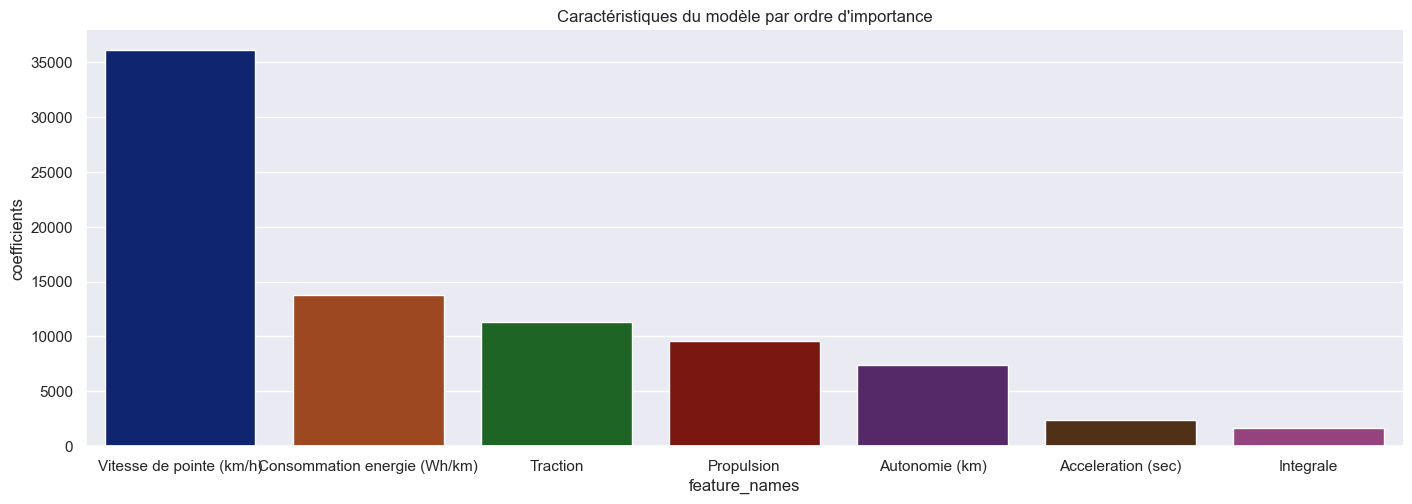

In [ ]:
# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()
sns.set_theme(style="darkgrid")
# Visualize ranked features using seaborn
sns.catplot(x="feature_names",
            y="coefficients",
            data=feature_importance.sort_values(by="coefficients", ascending=False),
            kind="bar",
            palette="dark",
            aspect=20/7)
plt.title("Caractéristiques du modèle par ordre d'importance");

Conclusion:
L'analyse de ce jeu de données nous a permis de balayer les grandes lignes du parcours Data Essentials de Jedha. Cette formation nous a également permis de rechercher par nous même afin d'approfondir les notions autour de la Data Analyse.

                                                                                          🥰FIN🥰